In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from ast import literal_eval

# download data
movies= pd.read_csv('movies.csv')
ratings=pd.read_csv('ratings.csv')
tags=pd.read_csv('tags.csv')

preparing the movies data

In [ ]:
movies.head(5)
def remove_year(title):
    return title[:-7]

movies['title'] = movies['title'].apply(remove_year)
movies['genres'] = movies['genres'].str.lower().str.split('|')
movies.head(5)

,movieId,title,genres
0,1,Toy Story,"[adventure, animation, children, comedy, fantasy]"
1,2,Jumanji,"[adventure, children, fantasy]"
2,3,Grumpier Old Men,"[comedy, romance]"
3,4,Waiting to Exhale,"[comedy, drama, romance]"
4,5,Father of the Bride Part II,[comedy]


preparing tags data

In [ ]:
def remove_spacing(x):
    return x.replace(" ", "").lower()
del tags['timestamp']
del tags['userId']
tags['tag'] = tags['tag'].apply(remove_spacing)

In [ ]:

tags_combined = tags.groupby('movieId')['tag'].apply(lambda x: ','.join(x)).reset_index()
tags = tags.drop(columns='tag').drop_duplicates().merge(tags_combined, on='movieId')
tags['tag'] = tags['tag'].str.split(",")
tags = tags.drop_duplicates(subset=['movieId'])
tags.head(5)
# print(tags_combined)


,movieId,tag
0,60756,"[funny, highlyquotable, willferrell, comedy, f..."
1,89774,"[boxingstory, mma, tomhardy]"
2,106782,"[drugs, leonardodicaprio, martinscorsese, stoc..."
3,48516,"[waytoolong, leonardodicaprio, suspense, twist..."
4,431,"[alpacino, gangster, mafia]"


preparing ratings data

In [ ]:
del ratings['timestamp']
ratings.head(5)

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


merging movies and tags data

In [ ]:
tags.columns = ['movieId','tag']
movies = movies.merge(tags, on='movieId')
movies.head(5)

,movieId,title,genres,tag
0,1,Toy Story,"[adventure, animation, children, comedy, fantasy]","[pixar, pixar, fun]"
1,2,Jumanji,"[adventure, children, fantasy]","[fantasy, magicboardgame, robinwilliams, game]"
2,3,Grumpier Old Men,"[comedy, romance]","[moldy, old]"
3,5,Father of the Bride Part II,[comedy],"[pregnancy, remake]"
4,7,Sabrina,"[comedy, romance]",[remake]


creating the movie db

In [ ]:
movies['sum'] = movies['genres'] + movies['tag']
movies_db = movies[['movieId', 'title', 'sum']]
movies_db['sum'] = movies_db['sum'].apply(lambda x: ' '.join(x).lower())
movies_db.head(5)

<ipython-input-51-8e81b9ae0f8d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_db['sum'] = movies_db['sum'].apply(lambda x: ' '.join(x).lower())


,movieId,title,sum
0,1,Toy Story,adventure animation children comedy fantasy pi...
1,2,Jumanji,adventure children fantasy fantasy magicboardg...
2,3,Grumpier Old Men,comedy romance moldy old
3,5,Father of the Bride Part II,comedy pregnancy remake
4,7,Sabrina,comedy romance remake


creating the Similarity using cosine_sim

In [ ]:
cv = CountVectorizer(max_features=2000, stop_words='english')
cmatrix = cv.fit_transform(movies_db['sum']).toarray()
similarity = cosine_similarity(cmatrix)

In [ ]:
def rec(movie):
    # check if movie exists
    if movie not in movies_db['title'].values:
        return f'{movie} does not exist in database.'

    index = movies_db[movies_db['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x: x[1])
    movies_list = distances[1:6]
    # for i in movies_list:
    #     print(movies_db.iloc[i[0]].ctitle)

    recommendations = []
    for i in movies_list:
        recommendations.append((movies_db.iloc[i[0]].title, i[1]))

    return recommendations

def recommend(movie):
    recommendations = rec(movie)
    if recommendations:
        titles, scores = zip(*recommendations)
        plt.figure(figsize=(10, 6))
        plt.barh(titles, scores, color='skyblue')
        plt.xlabel('Similarity Score')
        plt.title(f'Movies similar to "{movie}"')
        plt.gca().invert_yaxis()
        plt.show()

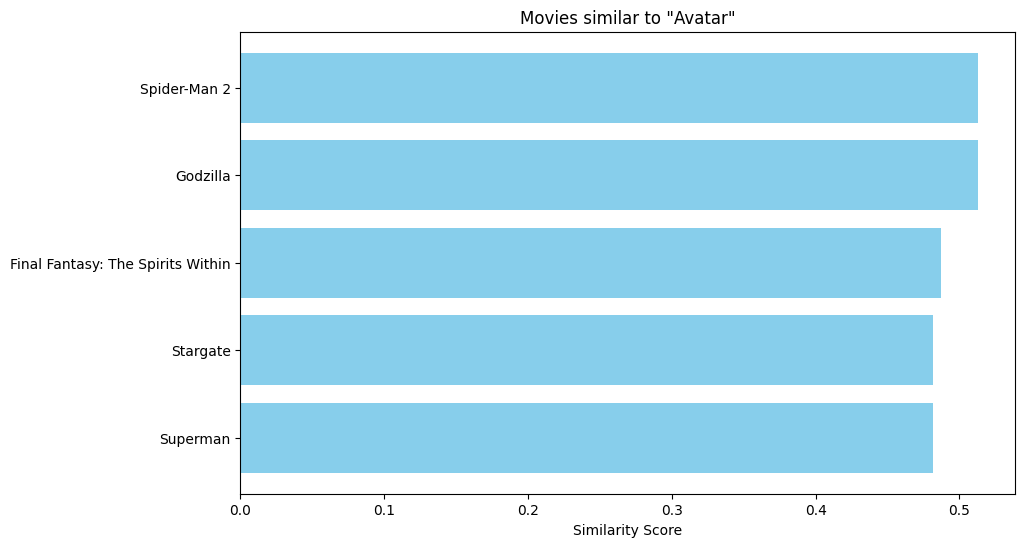

In [ ]:
recommend('Avatar')

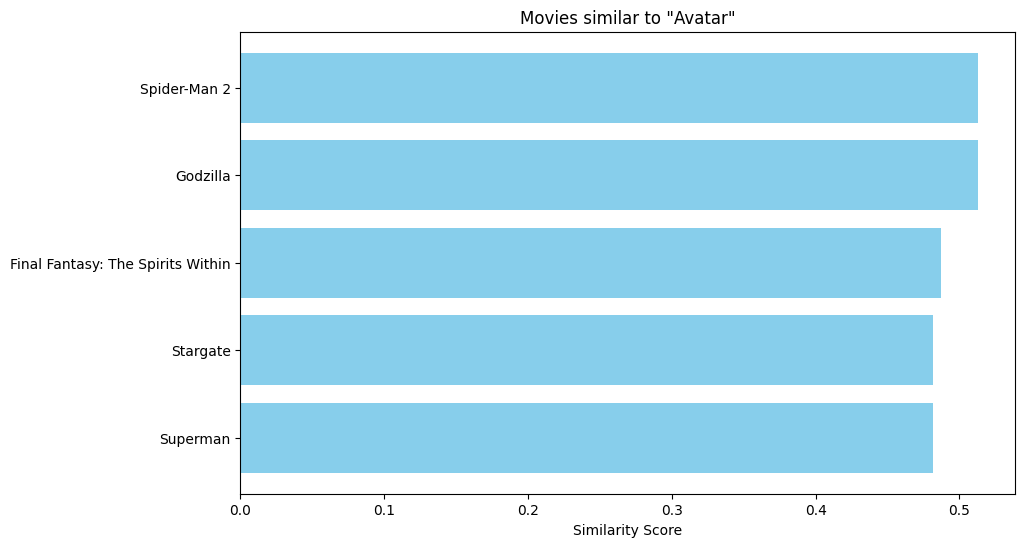

In [ ]:
recommend("Avatar")

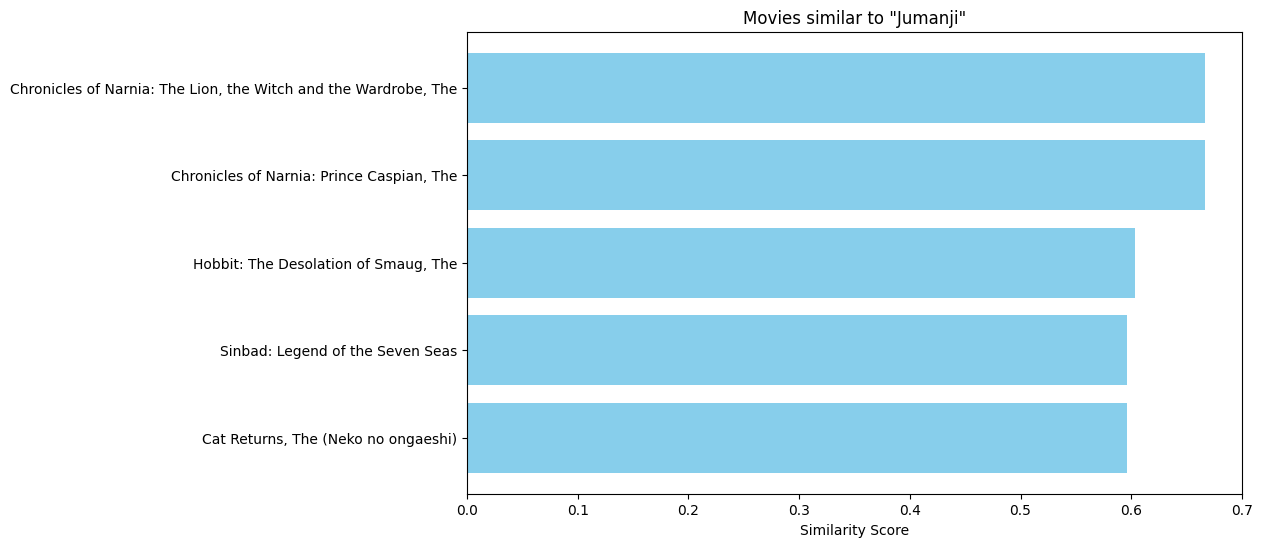

In [ ]:
recommend("Jumanji")

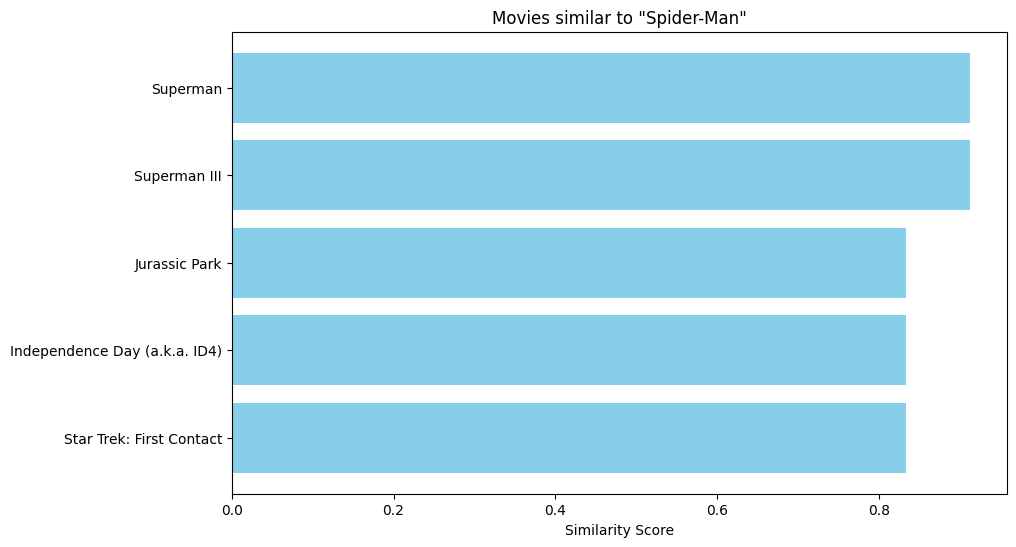

In [ ]:
recommend("Spider-Man")

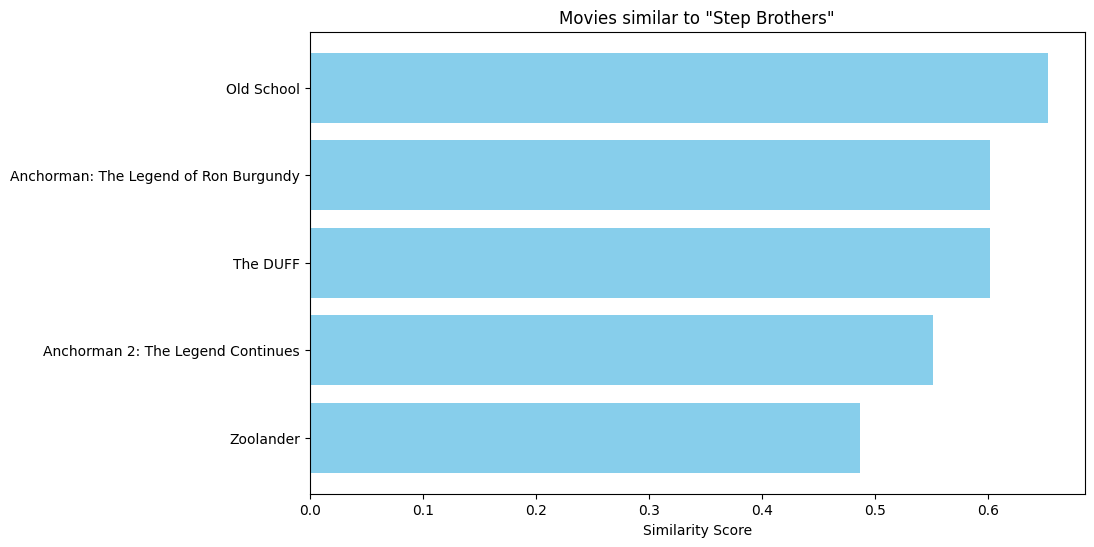

In [ ]:
recommend("Step Brothers")